## library and global value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer


#ubah font size pie chart 
plt.rcParams['font.size'] = 13

## Function

In [2]:
def split_x_y(data):
    y=data.iloc[:,-1:]
    X=data.iloc[:,0:-1]
    return X,y

def pie_chart(y):
    total=len(y)
    #kelas unik 
    kelas=y.iloc[:,0].unique()
    
    dict_kelas={}
    
    # input kelas ke dict_kelas 
    for i in kelas:
        dict_kelas[i]=0
        
    # hitung frekuensi tiap kelas 
    for i in y.iloc[:,-1]:
        dict_kelas[i]+=1

    labels=list(dict_kelas)
    sizes=list(np.array(list(dict_kelas.values()))/total)

    fig = plt.figure(figsize =(10, 7)) 
    plt.pie(sizes, labels = labels,autopct='%1.1f%%') 

    plt.show()

# transform data jika data int dan categorical 
def transform_data(X,y):
    y=y.to_numpy().ravel()
    y=LabelEncoder().fit_transform(y)
    numerical_ix = X.select_dtypes(include=['int64']).columns
    categorical_ix = X.select_dtypes(include=['object']).columns
    t = [('cat', OneHotEncoder(sparse=False), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
    col_transform = ColumnTransformer(transformers=t)
    X=col_transform.fit_transform(X)
    return X,y,categorical_ix,numerical_ix

# transform data jika data int dan float 
def transform_data_2(X,y):
    y=y.to_numpy().ravel() # ravel() akan merubah dari (n,) menjadi (n,1)
    y=LabelEncoder().fit_transform(y)
    int_ix = X.select_dtypes(include=['int64']).columns
    float_ix = X.select_dtypes(include=['float64']).columns
    t = [('float', MinMaxScaler(), float_ix), ('int', MinMaxScaler(), int_ix)]
    col_transform = ColumnTransformer(transformers=t)
    X=col_transform.fit_transform(X)
    return X,y,float_ix,int_ix


# hitung jumlah kategori di tiap categorical feature 
def jumlah_kategori_fitur(X,categorical_ix,numerical_ix):
    # cek kesesuaian jumlah kolom fitur hasil preprocessing -> 
    print("cek kesesuaian jumlah kolom fitur hasil preprocessing \n")
    sum=0
    for i in categorical_ix:
        print(i,"=",len(X[i].unique())," kategori")
        sum=sum+len(X[i].unique())
    print("\nTOTAL KATEGORI= ",sum)
    print("TOTAL KOLOM NUMERICAL= ",len(numerical_ix))
    print("TOTAL = ",sum+len(numerical_ix))
    

def show_values(X):
    cat_df=X.select_dtypes(include='object')
    cat_cols=cat_df.columns
    for i in cat_cols:
        print(i,'\n')
        print(X[i].value_counts(),'\n')


def ekspor_data(X,y,nama_X,nama_y):
    X=pd.DataFrame(X)
    y=pd.DataFrame(y)
    X.to_csv('dataset/'+nama_X+'.csv',index=False)
    y.to_csv('dataset/'+nama_y+'.csv',index=False)

### Read Data

In [3]:
direktori_bank= 'dataset/bank-full.csv'
data_bank=pd.read_csv(direktori_bank,sep=';')
direktori_credit= 'dataset/credit_card.csv'
data_credit=pd.read_csv(direktori_credit)
direktori_income= 'dataset/census_income.csv'
data_income=pd.read_csv(direktori_income)

### BANK MARKETING DATASET

#### Basic info

In [4]:
data_bank.info()
# terdiri dari 2 tipe data yaitu int64 (coninuous) dan object (categorical).
# 7 int64 data dan 10 object data 
# tidak ada null data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Delete row or column with irrelevant values

In [5]:
data_bank=data_bank.drop(['duration'],axis=1)
# Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
# Yet, the duration is not known before a call is performed. 
# Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes
# and should be discarded if the intention is to have a realistic predictive model.

In [6]:
# show if there is inappropriate values 
show_values(data_bank)
# ada beberapa kolom yang memiliki unknown value :
# - job : 288 (paling kecil dibanding kelas lain di kolom job)
# - education : 1857 (paling kecil dibanding kelas lain di kolom education)
# - contact : 13020 (terbesar kedua dibanding kelas lain di kolom contact)
# - poutcome : 36959 (terbesar dibanding kelas lain di kolom poutcome)

# karena di job dan education tidak terlalu banyak yg unknown maka yg di hapus barisnya 
# karena di contact dan poutcome sangat dominan dan nilanya besar sekali dibandingkan seluruh data, maka yg
# dihapus adalah kolom contact dan poutcome 

job 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default 

no     44396
yes      815
Name: default, dtype: int64 

housing 

yes    25130
no     20081
Name: housing, dtype: int64 

loan 

no     37967
yes     7244
Name: loan, dtype: int64 

contact 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

month 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 

poutcome 

In [7]:
#hapus kolom karena unknown dominan 
data_bank=data_bank.drop(['poutcome'],axis=1)

In [8]:
#hapus kolom karena unknown dominan
data_bank=data_bank.drop(['contact'],axis=1)

In [9]:
#hapus baris karena nilainya unknown
data_bank=data_bank.loc[(data_bank.education != 'unknown')]
data_bank=data_bank.loc[(data_bank.job != 'unknown')]

In [10]:
show_values(data_bank)

job 

blue-collar      9278
management       9216
technician       7355
admin.           5000
services         4004
retired          2145
self-employed    1540
entrepreneur     1411
unemployed       1274
housemaid        1195
student           775
Name: job, dtype: int64 

marital 

married     25946
single      12219
divorced     5028
Name: marital, dtype: int64 

education 

secondary    23131
tertiary     13262
primary       6800
Name: education, dtype: int64 

default 

no     42411
yes      782
Name: default, dtype: int64 

housing 

yes    24292
no     18901
Name: housing, dtype: int64 

loan 

no     36086
yes     7107
Name: loan, dtype: int64 

month 

may    13192
jul     6601
aug     6037
jun     4980
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: month, dtype: int64 

y 

no     38172
yes     5021
Name: y, dtype: int64 



In [23]:
data_bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,1,-1,0,no


In [26]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 14 columns):
age          43193 non-null int64
job          43193 non-null object
marital      43193 non-null object
education    43193 non-null object
default      43193 non-null object
balance      43193 non-null int64
housing      43193 non-null object
loan         43193 non-null object
day          43193 non-null int64
month        43193 non-null object
campaign     43193 non-null int64
pdays        43193 non-null int64
previous     43193 non-null int64
y            43193 non-null object
dtypes: int64(6), object(8)
memory usage: 4.9+ MB


#### Encoding

In [ ]:
#categorical ordinal (label encoder) : education
#categorical binary (binary label encoder) : housing, loan,default,
#categorical nominal (one hot encoder) : job,marital
#coninuous (MinMaxScaler encoder) : age,balance, day,  

In [24]:
#label encoding column dictionary
dict_education={'primary':1,'secondary':2,'tertiary':3}
dict_month={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}


In [25]:
data_bank.replace({"education":dict_education})

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,y
0,58,management,married,3,no,2143,yes,no,5,may,1,-1,0,no
1,44,technician,single,2,no,29,yes,no,5,may,1,-1,0,no
2,33,entrepreneur,married,2,no,2,yes,yes,5,may,1,-1,0,no
5,35,management,married,3,no,231,yes,no,5,may,1,-1,0,no
6,28,management,single,3,no,447,yes,yes,5,may,1,-1,0,no
7,42,entrepreneur,divorced,3,yes,2,yes,no,5,may,1,-1,0,no
8,58,retired,married,1,no,121,yes,no,5,may,1,-1,0,no
9,43,technician,single,2,no,593,yes,no,5,may,1,-1,0,no
10,41,admin.,divorced,2,no,270,yes,no,5,may,1,-1,0,no
11,29,admin.,single,2,no,390,yes,no,5,may,1,-1,0,no


In [13]:
data_bank.info()
#data unknown yang dihapus = 45211-43193= 2018
#ada tiga column yg dihapus dari proses sebelumnya : contact, puotcome, dan duration

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 14 columns):
age          43193 non-null int64
job          43193 non-null object
marital      43193 non-null object
education    43193 non-null object
default      43193 non-null object
balance      43193 non-null int64
housing      43193 non-null object
loan         43193 non-null object
day          43193 non-null int64
month        43193 non-null object
campaign     43193 non-null int64
pdays        43193 non-null int64
previous     43193 non-null int64
y            43193 non-null object
dtypes: int64(6), object(8)
memory usage: 4.9+ MB


In [14]:
int_ix = data_bank.select_dtypes(include=['int64']).columns

In [15]:
print(int_ix )

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], dtype='object')


In [16]:
#preprocessing 

## minmaxscaler 
transformer= ColumnTransformer(transformers=[('num',MinMaxScaler(),int_ix)],remainder='passthrough')
data_bank_1=transformer.fit_transform(data_bank)

In [17]:
columnss=data_bank.columns

In [18]:
baru=pd.DataFrame(data_bank_1,columns=columnss)

In [20]:
baru.head()

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,y
0,0.519481,0.0922594,0.133333,0,0,0,management,married,tertiary,no,yes,no,may,no
1,0.337662,0.0730667,0.133333,0,0,0,technician,single,secondary,no,yes,no,may,no
2,0.194805,0.0728215,0.133333,0,0,0,entrepreneur,married,secondary,no,yes,yes,may,no
3,0.220779,0.0749006,0.133333,0,0,0,management,married,tertiary,no,yes,no,may,no
4,0.12987,0.0768616,0.133333,0,0,0,management,single,tertiary,no,yes,yes,may,no


In [22]:
data_bank_1

array([[0.5194805194805194, 0.09225936484302653, 0.13333333333333333,
        ..., 'no', 'may', 'no'],
       [0.3376623376623377, 0.07306665698255044, 0.13333333333333333,
        ..., 'no', 'may', 'no'],
       [0.19480519480519481, 0.07282152779038731, 0.13333333333333333,
        ..., 'yes', 'may', 'no'],
       ...,
       [0.7012987012987013, 0.12468904908031159, 0.5333333333333333, ...,
        'no', 'nov', 'yes'],
       [0.5064935064935066, 0.07886804786374449, 0.5333333333333333, ...,
        'no', 'nov', 'no'],
       [0.24675324675324678, 0.09977666006936249, 0.5333333333333333,
        ..., 'no', 'nov', 'no']], dtype=object)

In [21]:
baru['month']

0         no
1         no
2         no
3         no
4         no
5        yes
6         no
7         no
8         no
9         no
10        no
11        no
12        no
13        no
14        no
15        no
16        no
17        no
18        no
19        no
20        no
21        no
22        no
23        no
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
43163     no
43164     no
43165     no
43166     no
43167     no
43168     no
43169     no
43170     no
43171     no
43172     no
43173     no
43174     no
43175     no
43176     no
43177     no
43178     no
43179     no
43180     no
43181     no
43182     no
43183     no
43184     no
43185     no
43186     no
43187     no
43188     no
43189     no
43190     no
43191     no
43192     no
Name: month, Length: 43193, dtype: object

In [13]:
X,y=split_x_y(data_bank)

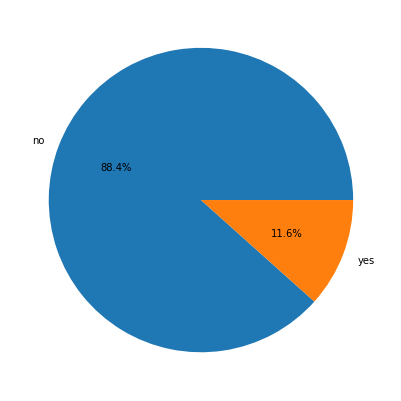

In [14]:
pie_chart(y)
#terlihat bahwa data merupakan imbalance binary dataset


In [15]:
print("ukuran sebelum transform")
print("y= ",y.shape)
print("X= ",X.shape)

ukuran sebelum transform
y=  (43193, 1)
X=  (43193, 13)


In [16]:
# Data Transformation 


X_after,y_after,categorical_ix,numerical_ix=transform_data(X,y)

In [17]:
print("ukuran setelah transform")
print("y= ",y_after.shape)
print("X= ",X_after.shape)

ukuran setelah transform
y=  (43193,)
X=  (43193, 41)


In [18]:
jumlah_kategori_fitur(X,categorical_ix,numerical_ix)

cek kesesuaian jumlah kolom fitur hasil preprocessing 

job = 11  kategori
marital = 3  kategori
education = 3  kategori
default = 2  kategori
housing = 2  kategori
loan = 2  kategori
month = 12  kategori

TOTAL KATEGORI=  35
TOTAL KOLOM NUMERICAL=  6
TOTAL =  41


In [19]:
ekspor_data(X_after,y_after,'X_bank','y_bank')

### DEFAULT of CREDIT CARD CLIENTS DATASET

In [36]:
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [38]:
# check null values 
data_credit.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [39]:
X,y=split_x_y(data_credit)

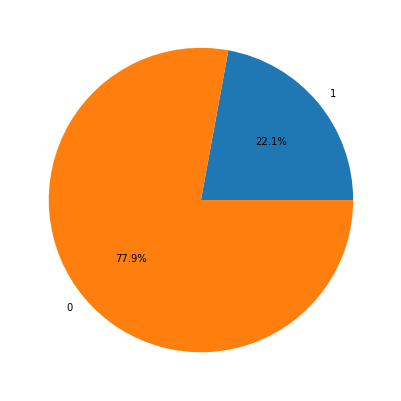

In [40]:
pie_chart(y)

In [41]:
print("ukuran sebelum transform")
print("y= ",y.shape)
print("X= ",X.shape)

ukuran sebelum transform
y=  (30000, 1)
X=  (30000, 24)


In [42]:
X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
5,6,50000.0,1,1,2,37,0,0,0,0,...,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
6,7,500000.0,1,1,2,29,0,0,0,0,...,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0


In [43]:
X_after,y_after,float_ix,numerical_ix=transform_data_2(X,y)

In [44]:
print("ukuran setelah transform")
print("y= ",y_after.shape)
print("X= ",X_after.shape)

ukuran setelah transform
y=  (30000,)
X=  (30000, 24)


In [45]:
X_after

array([[0.01010101, 0.14998173, 0.06916432, ..., 0.1       , 0.        ,
        0.        ],
       [0.11111111, 0.14889243, 0.06785751, ..., 0.2       , 0.2       ,
        0.4       ],
       [0.08080808, 0.17239231, 0.07953247, ..., 0.2       , 0.2       ,
        0.2       ],
       ...,
       [0.02020202, 0.14967379, 0.06940538, ..., 0.1       , 0.2       ,
        0.2       ],
       [0.07070707, 0.14506354, 0.14060442, ..., 0.2       , 0.2       ,
        0.1       ],
       [0.04040404, 0.1889308 , 0.11263272, ..., 0.2       , 0.2       ,
        0.2       ]])

In [46]:
ekspor_data(X_after,y_after,'X_credit','y_credit')

### CENSUS INCOME DATASET

In [4]:
data_income

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [5]:
data_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# to check inappropirate values 
show_values(data_income)

workclass 

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 

education 

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64 

marital.status 

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64 

occupation 

Prof-specialty       4140
Craft-repair    

In [81]:
# preprocess inappropriate values (hapus row yang punya nilai '?')
data_income_step1=data_income.loc[(data_income.workclass != '?')]
data_income_step2=data_income_step1.loc[(data_income_step1.occupation != '?')]
data_income_step3=data_income_step2.loc[(data_income_step2['native.country'] != '?')]
data_final=data_income_step3

In [82]:
show_values(data_final)

workclass 

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64 

education 

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64 

marital.status 

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital.status, dtype: int64 

occupation 

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales 

In [83]:
usa=len(data_income_step3[data_final['native.country']=='United-States'])
non_usa=len(data_final)-usa
print(usa)
print(non_usa)

27504
2658


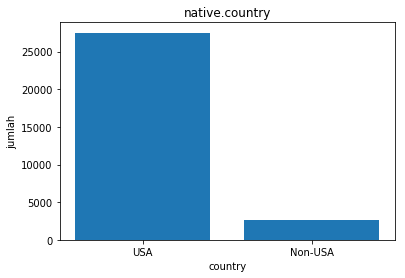

In [84]:
import matplotlib.pyplot as plt
   
Country = ['USA','Non-USA',]
GDP_Per_Capita = [27504,2658]

plt.bar(Country, GDP_Per_Capita)
plt.title('native.country')
plt.xlabel('country')
plt.ylabel('jumlah')
plt.show()

In [86]:
#split jadi x dan y
X,y=split_x_y(data_final)

In [11]:
X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States


In [87]:
cat=X.select_dtypes(include='object')
col_cat=cat.columns
for i in col_cat:
    print(i," : ",end=" ")
    print(data_final[i].unique().size)

workclass  :  7
education  :  16
marital.status  :  7
occupation  :  14
relationship  :  6
race  :  5
sex  :  2
native.country  :  41


In [88]:
data_final['native.country'].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'Hungary', 'Columbia', 'Guatemala', 'El-Salvador', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos', 'Thailand',
       'Outlying-US(Guam-USVI-etc)', 'Scotland'], dtype=object)

sumber: http://rstudio-pubs-static.s3.amazonaws.com/265200_a8d21a65d3d34b979c5aafb0de10c221.html
karena native.country terlalu banyak, nantinya ketika one hot encoder akan menyebabkan dimensi data besar sekali. oleh karena itu, di kelompokkan lagi native.country menjadi region. kecuali USA, karena datanya paling banyak 
Asia_East <- c(" Cambodia", " China", " Hong", " Laos", " Thailand",
               " Japan", " Taiwan", " Vietnam")

Asia_Central <- c(" India", " Iran")

Central_America <- c(" Cuba", " Guatemala", " Jamaica", " Nicaragua", 
                     " Puerto-Rico",  " Dominican-Republic", " El-Salvador", 
                     " Haiti", " Honduras", " Mexico", " Trinadad&Tobago")

South_America <- c(" Ecuador", " Peru", " Columbia")


Europe_West <- c(" England", " Germany", " Holand-Netherlands", " Ireland", 
                 " France", " Greece", " Italy", " Portugal", " Scotland")

Europe_East <- c(" Poland", " Yugoslavia", " Hungary")

In [71]:
# list country region
asia_east=["Cambodia","China","Hong","Laos","Thailand","Japan","Taiwan","Vietnam"]
asia_central=["India","Iran"]
central_america=["Cuba","Guatemala","Jamaica","Nicaragua","Puerto-Rico","Dominican-Republic","El-Salvador",
                 "Haiti","Honduras","Mexico","Trinadad&Tobago"]
south_america=["Ecuador","Peru","Columbia"]
europe_west=["England","Germany","Holand-Netherlands","Ireland", 
                 "France","Greece","Italy", "Portugal", "Scotland"]
europe_east=["Poland", "Yugoslavia", "Hungary"]

In [70]:
panjang=len(data_income_step3)
panjang

for i in range(0,panjang):
    if data_final['native.country'].iloc[i] in asia_east:
        data_final['native.country'].iloc[i]='asia_east'
    elif data_final['native.country'].iloc[i] in asia_central:
        data_final['native.country'].iloc[i]='asia_central'
    elif data_final['native.country'].iloc[i] in central_america:
        data_final['native.country'].iloc[i]='central_america'
        

30162

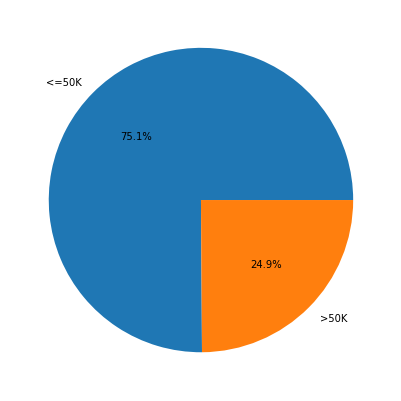

In [12]:
pie_chart(y)

In [13]:
print("ukuran sebelum transform")
print("y= ",y.shape)
print("X= ",X.shape)

ukuran sebelum transform
y=  (30162, 1)
X=  (30162, 14)


In [14]:
# TRANSFORM 1 
X_after,y_after,categorical_ix,numerical_ix=transform_data(X,y)

In [15]:
print("ukuran setelah transform")
print("y= ",y_after.shape)
print("X= ",X_after.shape)

ukuran setelah transform
y=  (30162,)
X=  (30162, 104)


In [16]:
X_after

array([[0.        , 0.        , 1.        , ..., 0.        , 1.        ,
        0.17346939],
       [0.        , 0.        , 1.        , ..., 0.        , 0.8953168 ,
        0.39795918],
       [0.        , 0.        , 1.        , ..., 0.        , 0.8953168 ,
        0.39795918],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.39795918],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.39795918],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.19387755]])

In [ ]:
# dimensi

In [17]:
jumlah_kategori_fitur(X,categorical_ix,numerical_ix)

cek kesesuaian jumlah kolom fitur hasil preprocessing 

workclass = 7  kategori
education = 16  kategori
marital.status = 7  kategori
occupation = 14  kategori
relationship = 6  kategori
race = 5  kategori
sex = 2  kategori
native.country = 41  kategori

TOTAL KATEGORI=  98
TOTAL KOLOM NUMERICAL=  6
TOTAL =  104


In [80]:
ekspor_data(X_after_1,y_after_1,'X_income','y_income')